Here we are Performing

- Sentiment analysis on amazon Iphone reviews data

- Word cloud for total reviews

- word cloud for postive reviews

- word cloud for negative reviews

Packages required for the analysis

- nltk: natural language tool kit used for text analysis

- pandas : used for anlayse dataframe

- vaderSentiment: used for provide sentiment scores 

- wordcloud: for provideing frequent words in image

- matplotlib and seborn: used for plotting

In [3]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00


In [1]:
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import numpy as np
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer
import string   
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer



$Step-1$:

## Reading the data

In phase one we alreday created a flow to get amazon iphine reviews and save the data in csv format, the same data we are using here

In [5]:
data=pd.read_csv('Rreviews123.csv')
data.head()

,Date Info,Country Info,Name,Review Title,Content,Rating,Link,Product Title
0,"December 1, 2022",Reviewed in the United States,Meg,"Pretty good value, minor grievances",Phone arrived in a generic box but was well pa...,4.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ..."
1,"October 27, 2022",Reviewed in the United States,Tangero,"Great phone, even in 2022",I love the light weight and smaller form facto...,4.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ..."
2,"September 9, 2021",Reviewed in the United States,MatthewX,Perfect phone for someone like me.,I previously purchased from Amazon Renewed an ...,5.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ..."
3,"November 11, 2022",Reviewed in the United States,Justin,"Phone works, customer service was responsive i...",The phone (refurbished) seems to be working fi...,5.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ..."
4,"November 30, 2022",Reviewed in the United States,Oscar,What should you expect?,Received and opened. Had a roughed and scratch...,4.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ..."


In [6]:
data.columns

Index(['Date Info', 'Country Info', 'Name', 'Review Title', 'Content',
       'Rating', 'Link', 'Product Title'],
      dtype='object')

In [7]:
data.dtypes

Date Info        object
Country Info     object
Name             object
Review Title     object
Content          object
Rating           object
Link             object
Product Title    object
dtype: object

In [34]:
data.shape

(284, 11)

In [8]:
data.isnull().sum()  
# understanding any null/missing  values are present
# Our main Column here is Review Title which having reviews information
# We can see below it has 7 missing values
# out of 284 we have 7 missing values

Date Info        0
Country Info     0
Name             0
Review Title     7
Content          3
Rating           7
Link             0
Product Title    0
dtype: int64

In [35]:
7/284
# which means only 0.02% data has missed so we can drop those values

0.02464788732394366

In [9]:
data=data.dropna()
# dropping missing values

In [10]:
data.isnull().sum()
# after dropping we are checking still any missing value are there
# There is no missing values

Date Info        0
Country Info     0
Name             0
Review Title     0
Content          0
Rating           0
Link             0
Product Title    0
dtype: int64

$Step-2$

## Text preprocessing

- Text preprocessing one of most important technique in text analytics

- Here we are removing any punctuationsa are there

- We are removing emojis

- We are removing english stop words  ex: a, an,the,was,is etc

- We also providing stem of particular words like 

    fish, 
    
    fisher,
    
    fishing, 
    
    fished all equal to fish only

In [11]:
STOPWORDS=stopwords.words("english")  # Reading English stopwords

In [12]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [13]:
def clean_text(text):
    ps=PorterStemmer()
    
    text=deEmojify(text)                                                    # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation])  # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned)                            # remove extra white spaces
    text_cleaned=text_cleaned.lower()                                       # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS]            # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])

    
    
    return text_cleaned

In [14]:
data['cleaned_reviews']=data['Review Title'].apply(lambda x:clean_text(x))
# Creating a new column with name cleaned_reviews

In [15]:
data.head()

,Date Info,Country Info,Name,Review Title,Content,Rating,Link,Product Title,cleaned_reviews
0,"December 1, 2022",Reviewed in the United States,Meg,"Pretty good value, minor grievances",Phone arrived in a generic box but was well pa...,4.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ...",pretti good valu minor grievanc
1,"October 27, 2022",Reviewed in the United States,Tangero,"Great phone, even in 2022",I love the light weight and smaller form facto...,4.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ...",great phone even 2022
2,"September 9, 2021",Reviewed in the United States,MatthewX,Perfect phone for someone like me.,I previously purchased from Amazon Renewed an ...,5.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ...",perfect phone someon like
3,"November 11, 2022",Reviewed in the United States,Justin,"Phone works, customer service was responsive i...",The phone (refurbished) seems to be working fi...,5.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ...",phone work custom servic respons time manner
4,"November 30, 2022",Reviewed in the United States,Oscar,What should you expect?,Received and opened. Had a roughed and scratch...,4.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ...",expect


$Step-3$

## Word cloud

Here we are getting most frequent words from all the reviews

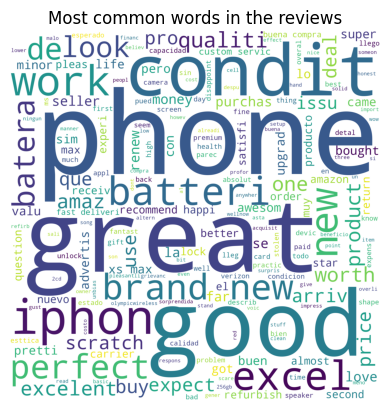

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(data['cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

$Step-4$

## Sentiment analysis

- Here we are performing sentiment analaysis

- We are using vaderSentiment

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is fully open-sourced under the [MIT License] (we sincerely appreciate all attributions and readily accept most contributions, but please don’t hold us liable).

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

## Polarity score 

Polarity refers to the overall sentiment conveyed by a particular text, phrase or word. This polarity can be expressed as a numerical rating known as a “sentiment score”. For example, this score can be a number between -100 and 100 with 0 representing neutral sentiment.

In [18]:
# Getting a polarity score
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [19]:
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound'] # returns the compound score from the dictionary

In [20]:
data['sentiment_score']=data['Review Title'].apply(lambda x:compound_score(x)) # applying on the reviews column to get the score

# Creating a new column name sentiment_score

In [21]:
data.head()

,Date Info,Country Info,Name,Review Title,Content,Rating,Link,Product Title,cleaned_reviews,sentiment_score
0,"December 1, 2022",Reviewed in the United States,Meg,"Pretty good value, minor grievances",Phone arrived in a generic box but was well pa...,4.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ...",pretti good valu minor grievanc,0.7184
1,"October 27, 2022",Reviewed in the United States,Tangero,"Great phone, even in 2022",I love the light weight and smaller form facto...,4.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ...",great phone even 2022,0.6249
2,"September 9, 2021",Reviewed in the United States,MatthewX,Perfect phone for someone like me.,I previously purchased from Amazon Renewed an ...,5.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ...",perfect phone someon like,0.7351
3,"November 11, 2022",Reviewed in the United States,Justin,"Phone works, customer service was responsive i...",The phone (refurbished) seems to be working fi...,5.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ...",phone work custom servic respons time manner,0.3612
4,"November 30, 2022",Reviewed in the United States,Oscar,What should you expect?,Received and opened. Had a roughed and scratch...,4.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ...",expect,0.0000


# Creating a function which divides reviews into three categories

- Postive

- negative

- neutral based on polarity scores

- Postive score means postive review

- negive score means negive review

- 0.00 score means neutral review

In [22]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"



In [23]:
data['review_category']=data['sentiment_score'].apply(lambda x:sentiment_category(x))

In [24]:
data.head()

,Date Info,Country Info,Name,Review Title,Content,Rating,Link,Product Title,cleaned_reviews,sentiment_score,review_category
0,"December 1, 2022",Reviewed in the United States,Meg,"Pretty good value, minor grievances",Phone arrived in a generic box but was well pa...,4.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ...",pretti good valu minor grievanc,0.7184,positive
1,"October 27, 2022",Reviewed in the United States,Tangero,"Great phone, even in 2022",I love the light weight and smaller form facto...,4.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ...",great phone even 2022,0.6249,positive
2,"September 9, 2021",Reviewed in the United States,MatthewX,Perfect phone for someone like me.,I previously purchased from Amazon Renewed an ...,5.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ...",perfect phone someon like,0.7351,positive
3,"November 11, 2022",Reviewed in the United States,Justin,"Phone works, customer service was responsive i...",The phone (refurbished) seems to be working fi...,5.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ...",phone work custom servic respons time manner,0.3612,positive
4,"November 30, 2022",Reviewed in the United States,Oscar,What should you expect?,Received and opened. Had a roughed and scratch...,4.0 out of 5 stars,https://www.amazon.com/Apple-iPhone-SE-128GB-R...,"Apple iPhone SE (2nd Generation), US Version, ...",expect,0.0000,neutral


In [32]:
data['review_category']

0      positive
1      positive
2      positive
3      positive
4       neutral
         ...   
289     neutral
290    positive
291    positive
292    positive
293     neutral
Name: review_category, Length: 284, dtype: object

<Axes: xlabel='review_category', ylabel='count'>

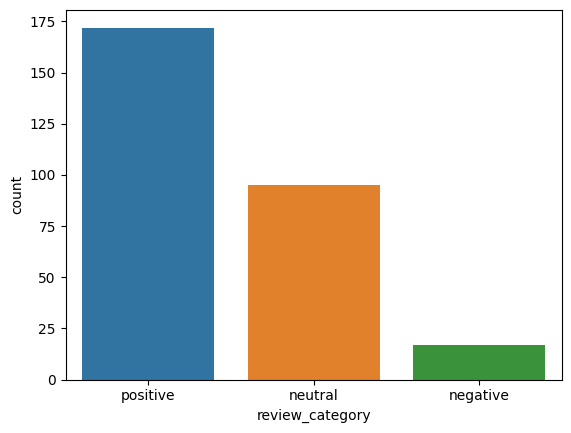

In [33]:
sns.countplot(x='review_category', data=data)

In [26]:
positive_reviews=data.loc[data['review_category']=='positive','cleaned_reviews'].tolist() # extracting all positive reviews and converting to a list
positive_reviews[0:5]

# Generating first Pos reviews

['pretti good valu minor grievanc',
 'great phone even 2022',
 'perfect phone someon like',
 'phone work custom servic respons time manner',
 'good happi phone']

In [27]:
negative_reviews=data.loc[data['review_category']=='negative','cleaned_reviews'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

#Generating first Pos reviews

['overli impress',
 'setup problem',
 'lower qualiti believ',
 'one phone low voic',
 'excelent cell sin ningun detal malo']

$Step-5$:

Performing wordcloud for postive reviews and negative reviews

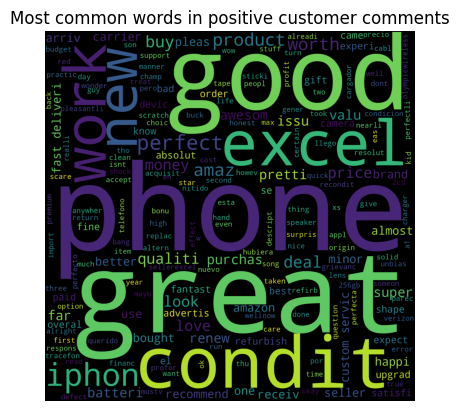

In [28]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(data.loc[data['review_category']=='positive','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()

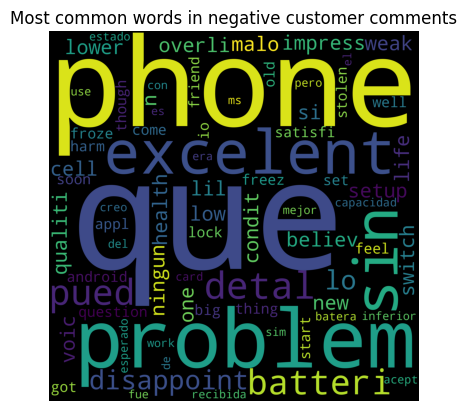

In [30]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(data.loc[data['review_category']=='negative','cleaned_reviews'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in negative customer comments")
plt.axis('off')
plt.show()